# Data Analysis For All Participants

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import groupby
from collections import Counter
# from jupyterthemes import jtplot
# jtplot.reset()
import os
import glob

In [2]:
""" Reads data in from all participants. The final virtual game data from 
In the Zone and Simon Says. 
python lists: 'InTheZone' and 'SimonSays'
"""

path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "../Data/All_Participants/InTheZone/*"))
InTheZone = []

for i in csv_files:
    df = pd.read_csv(i)
    InTheZone.append(df)
    
csv_files = glob.glob(os.path.join(path, "../Data/All_Participants/SimonSays/*"))
SimonSays = []

for i in csv_files:
    df = pd.read_csv(i)
    SimonSays.append(df)

In [3]:
def prerampspeed(data):
    """ Pulls the PreRamp Speed without processing.

    Args: 
        data - individual dataframes

    Returns:
        x_array - the individual speeds
        counts - the counts for each speed
    """
    pre_ramp_speed = data['PreRampSpeed']
        
    # Get counts for each speed
    pre_counts = pre_ramp_speed.value_counts()
    pre_index = pre_counts.index.to_numpy().reshape(-1,1)
    pre_vals = pre_counts.to_numpy().reshape(-1,1)
    
    pre_array = np.hstack((pre_index, pre_vals))
    pre_array = pre_array[pre_array[:,0].argsort()]

    x_array = pre_array[:,0]
    counts = pre_array[:,1]
        
    return x_array, counts

def prerampspeed_processing(data):
    """ Does the PreRamp Speed processing to separate into bins based on 
    the data size. 

    Args: 
        data - individual dataframes

    Returns:
        x_array - the bin numbers
        counts - the counts for each speed
    """
    pre_ramp_speed = data['PreRampSpeed']
    pre_ramp_speed = pre_ramp_speed[pre_ramp_speed != 0]
    
    pre_ramp_speed = (pre_ramp_speed - pre_ramp_speed.min()) / (pre_ramp_speed.max() - pre_ramp_speed.min())
    
    # Get counts for each speed
    pre_counts = pre_ramp_speed.value_counts()
    pre_index = pre_counts.index.to_numpy().reshape(-1,1)
    pre_vals = pre_counts.to_numpy().reshape(-1,1)
    
    pre_array = np.hstack((pre_index, pre_vals))
    pre_array = pre_array[pre_array[:,0].argsort()]

    # Binning into 5%
    bin_amount = int(np.ceil(len(pre_array) * .05))
    max_range = int(np.floor(len(pre_array) / bin_amount) + 1)
    
    bins = []
    i = 0
    j = bin_amount
    
    for z in range(0, max_range):
        bins.append(pre_array[i:j,:])
        i = j
        j += bin_amount

    counts = []

    x = 5
    x_array = []
    for i in bins:
        total = np.sum(i[:,1])
        if total != 0:
            counts.append(total)
            x_array.append(x)
            x += 5
        
    return x_array, counts

def postrampspeed(data):
    """ Pulls the PostRamp Speed without processing.

    Args: 
        data - individual dataframes

    Returns:
        x_array - the individual speeds
        counts - the counts for each speed
    """
    post_ramp_speed = data['PostRampSpeed']
    
    # Get counts for each speed
    post_counts = post_ramp_speed.value_counts()
    post_index = post_counts.index.to_numpy().reshape(-1,1)
    post_vals = post_counts.to_numpy().reshape(-1,1)
    
    post_array = np.hstack((post_index, post_vals))
    post_array = post_array[post_array[:,0].argsort()]

    x_array = post_array[:,0]
    counts = post_array[:, 1]
        
    return x_array, counts

def postrampspeed_processing(data):
    """ Does the PostRamp Speed processing to separate into bins based on 
    the data size. 

    Args: 
        data - individual dataframes

    Returns:
        x_array - the bin numbers
        counts - the counts for each speed
    """
    post_ramp_speed = data['PostRampSpeed']
    post_ramp_speed = post_ramp_speed[post_ramp_speed != 0]
    
    post_ramp_speed = (post_ramp_speed - post_ramp_speed.min()) / (post_ramp_speed.max() - post_ramp_speed.min())
    
    # Get counts for each speed
    post_counts = post_ramp_speed.value_counts()
    post_index = post_counts.index.to_numpy().reshape(-1,1)
    post_vals = post_counts.to_numpy().reshape(-1,1)
    
    post_array = np.hstack((post_index, post_vals))
    post_array = post_array[post_array[:,0].argsort()]

    # Binning into 5%
    bin_amount = int(np.ceil(len(post_array) * .05))
    max_range = int(np.floor(len(post_array) / bin_amount) + 1)

    bins = []
    i = 0
    j = bin_amount
    
    for z in range(0, max_range):
        bins.append(post_array[i:j,:])
        i = j
        j += bin_amount

    counts = []

    x = 5
    x_array = []
    for i in bins:
        total = np.sum(i[:,1])
        if total != 0:
            counts.append(total)
            x_array.append(x)
            x += 5
        
    return x_array, counts

def consecutivemotion_processing(data):
    """ Does the Consecutive Motions processing to separate into bins based on 
    the number of consecutive motions. After > 30, it sums the counts. 

    Args: 
        data - individual dataframes

    Returns:
        x_array - the number of consecutive motions
        counts - the counts for each number of motions
    """
    class_predictions = data['class']

    # makes a dictionary for consecutive motions of each class
    d = dict()
    for k, v in groupby(class_predictions):
        d.setdefault(k, []).append(len(list(v)))

    # make a list of consecutive motions without including 0 motion
    new_list = []
    for item in d:
        if item != 0:
            new_list.extend(d[item])

    # get the counts of each consecutive motion
    consecutive_motions = Counter(new_list)

    x_list = []
    greater_list = []
    for key in consecutive_motions:
        if key < 30:
            x_list.append(key)
            x_array = np.sort(x_list)
        else:
            greater_list.append(key)

    counts = []
    for item in x_array:
        counts.append(consecutive_motions[item])

    greater_total = 0
    for item in greater_list:
        greater_total += consecutive_motions[item]

    x_array = np.append(x_array, 30)
    counts.append(greater_total)

        
    return x_array, counts

## In the Zone

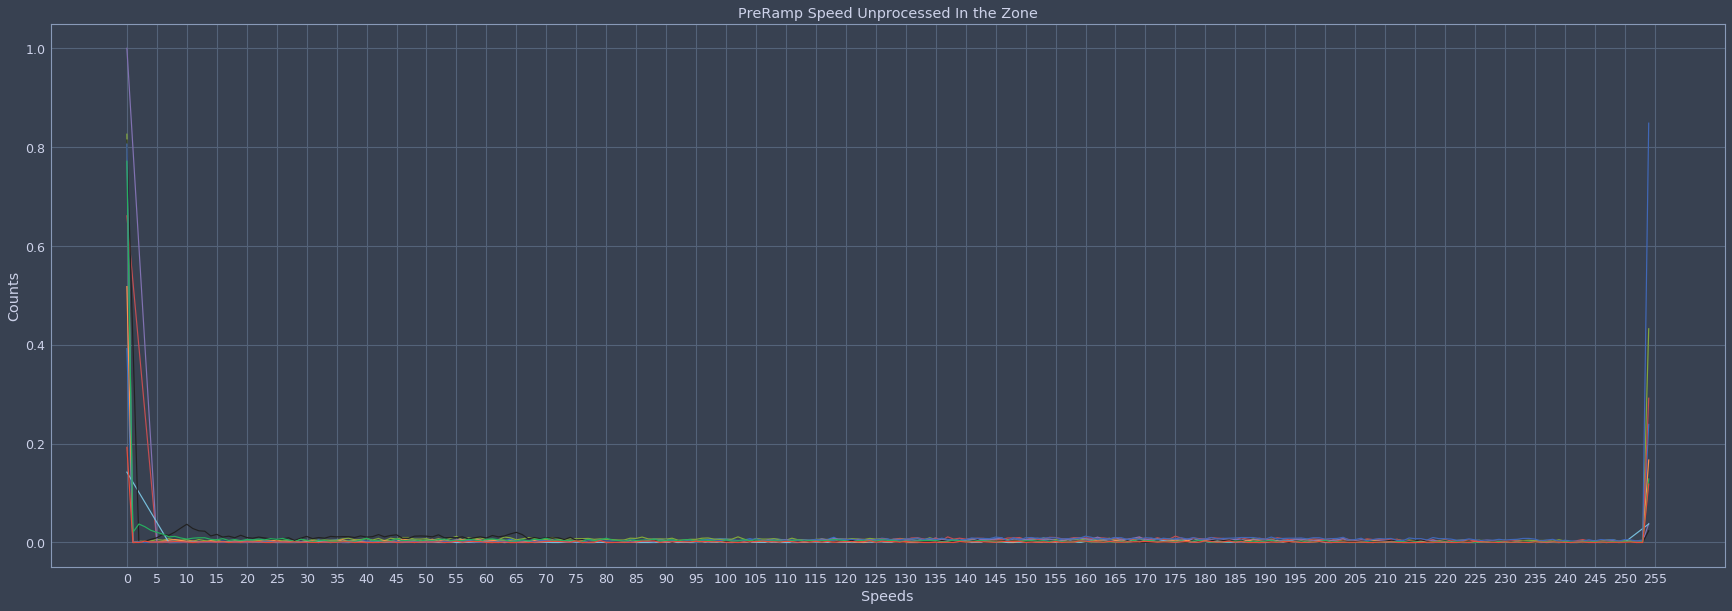

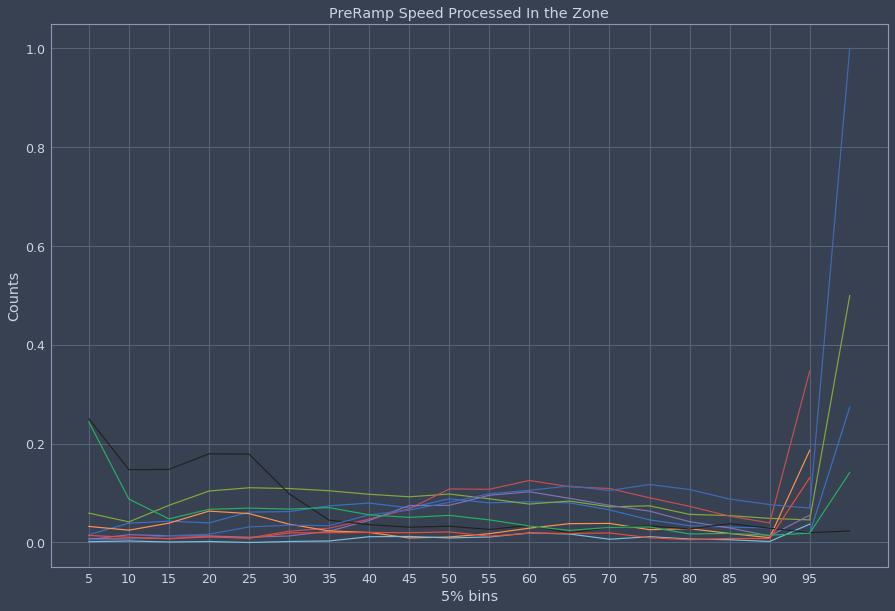

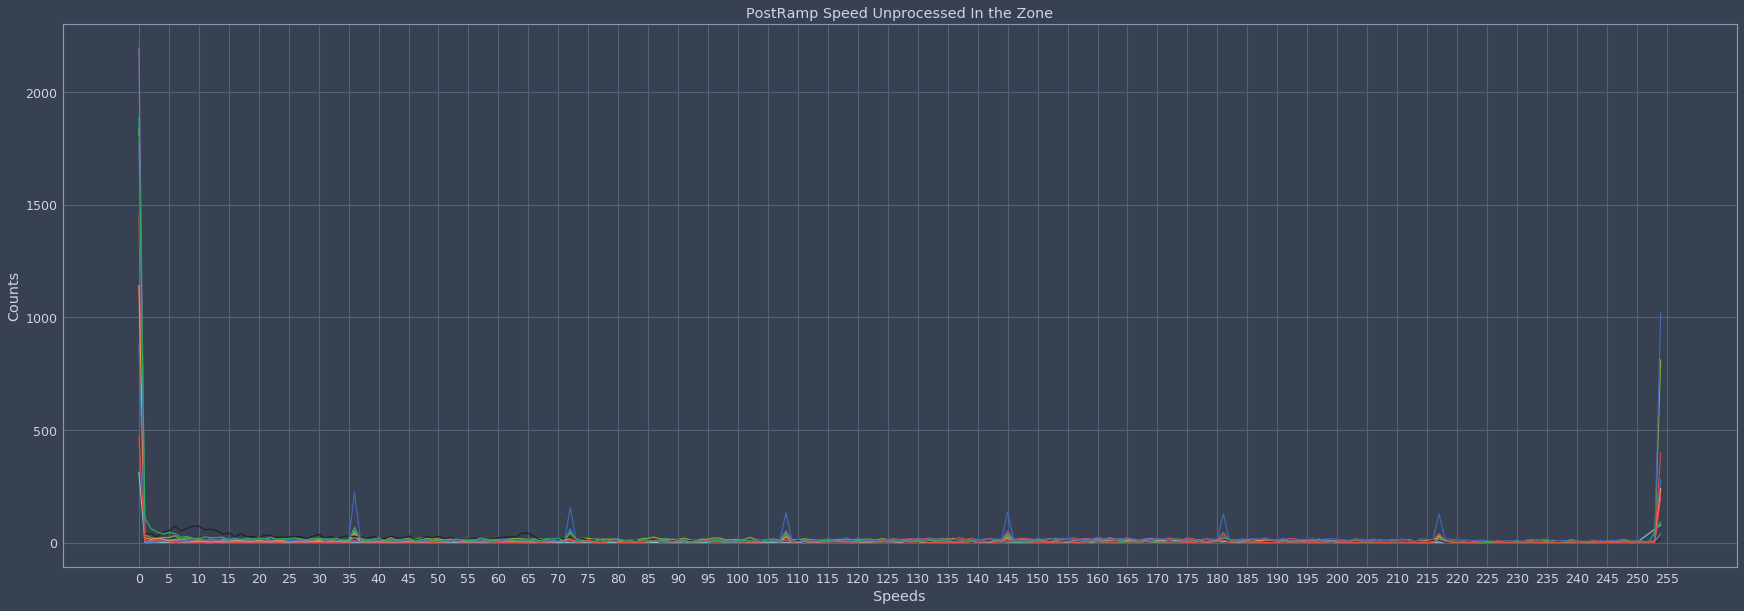

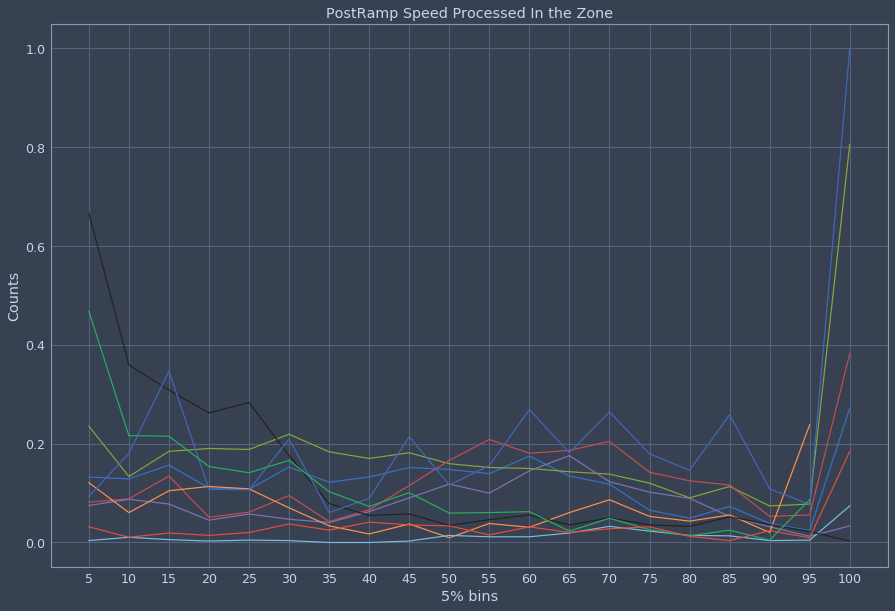

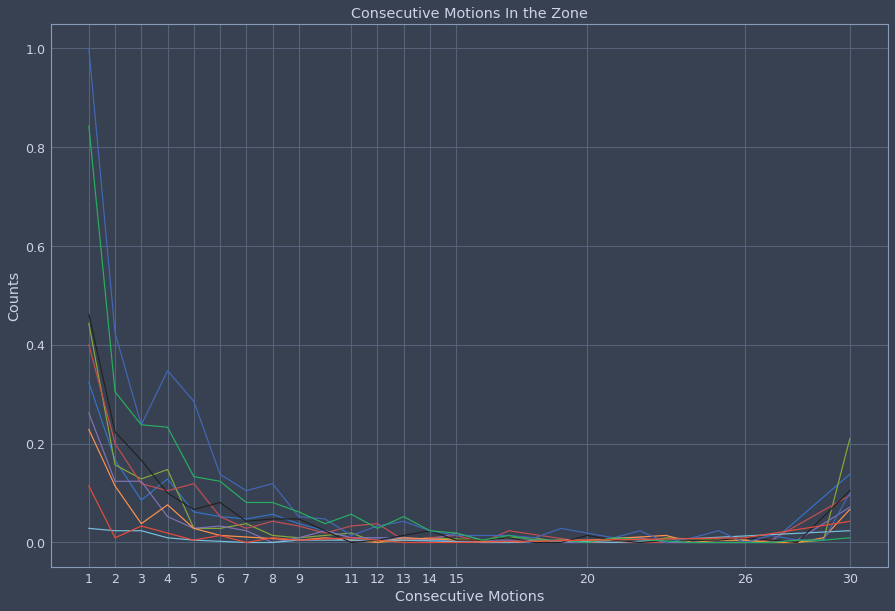

In [4]:
############################# PreRamp Speed Unprocessed #############################
plt.figure(figsize=(30,10))
x_array_list = []
counts_list = []
for data in InTheZone:
    x_array, counts = prerampspeed(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)

counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])
plt.title("PreRamp Speed Unprocessed In the Zone")
plt.xlabel("Speeds")
plt.ylabel("Counts")
plt.xticks(range(0, 260, 5))
plt.show()

############################# PreRamp Speed Processed #############################
plt.figure(figsize=(15,10))
x_array_list = []
counts_list = []
for data in InTheZone:
    x_array, counts = prerampspeed_processing(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)

counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])
plt.title("PreRamp Speed Processed In the Zone")
plt.xlabel("5% bins")
plt.ylabel("Counts")
plt.xticks(x_array)
plt.show()

############################# PostRamp Speed Unprocessed #############################
plt.figure(figsize=(30,10))
x_array_list = []
counts_list = []
for data in InTheZone:
    x_array, counts = postrampspeed(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)

counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list[i])
plt.title("PostRamp Speed Unprocessed In the Zone")
plt.xlabel("Speeds")
plt.ylabel("Counts")
plt.xticks(range(0, 260, 5))
plt.show()

############################# PostRamp Speed Processed #############################
plt.figure(figsize=(15,10))
x_array_list = []
counts_list = []
for data in InTheZone:
    x_array, counts = postrampspeed_processing(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)

counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])
plt.title("PostRamp Speed Processed In the Zone")
plt.xlabel("5% bins")
plt.ylabel("Counts")
plt.xticks(x_array)
plt.show()

############################# Consecutive Motion ############################# 
plt.figure(figsize=(15,10))
x_array_list = []
counts_list = []
for data in InTheZone:
    x_array, counts = consecutivemotion_processing(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)

counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])  
plt.title("Consecutive Motions In the Zone")
plt.xlabel("Consecutive Motions")
plt.ylabel("Counts")
plt.xticks(x_array)
plt.show()

## Simon Says

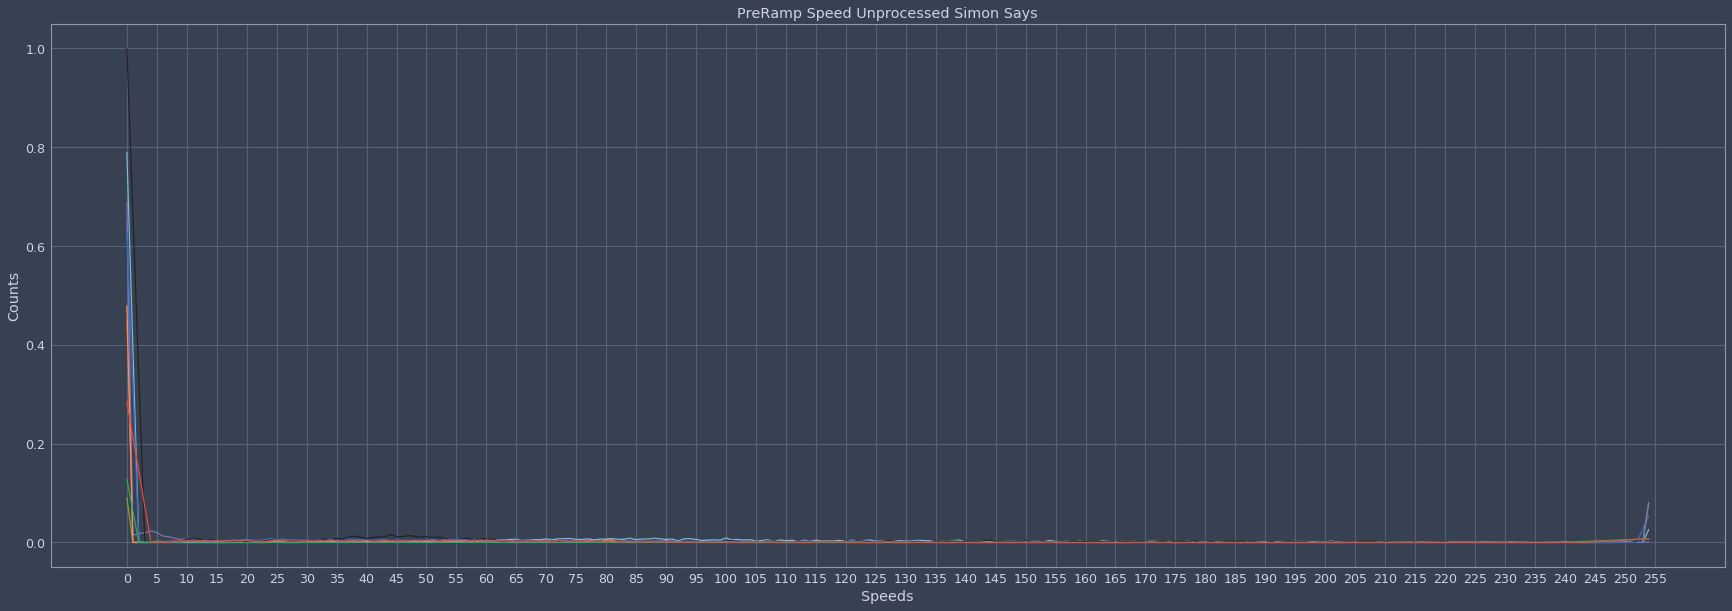

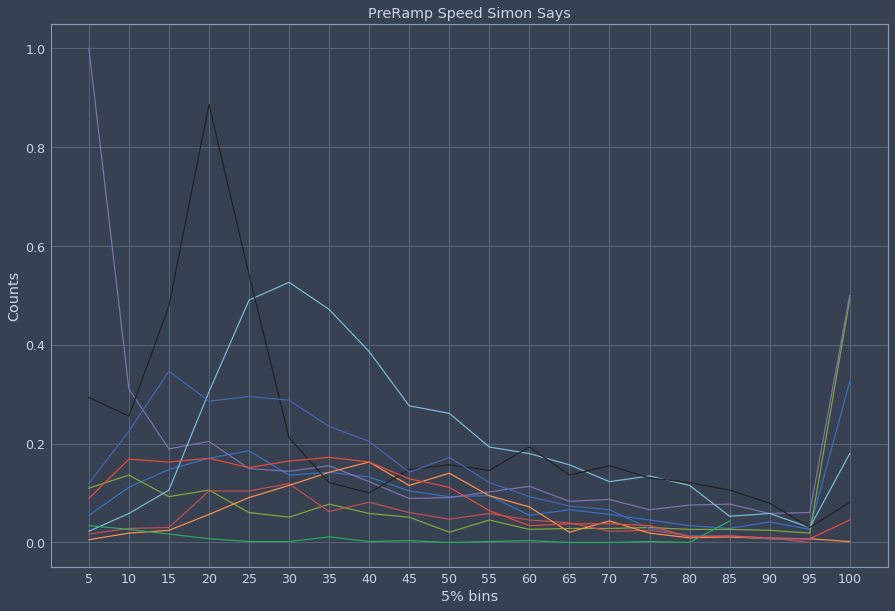

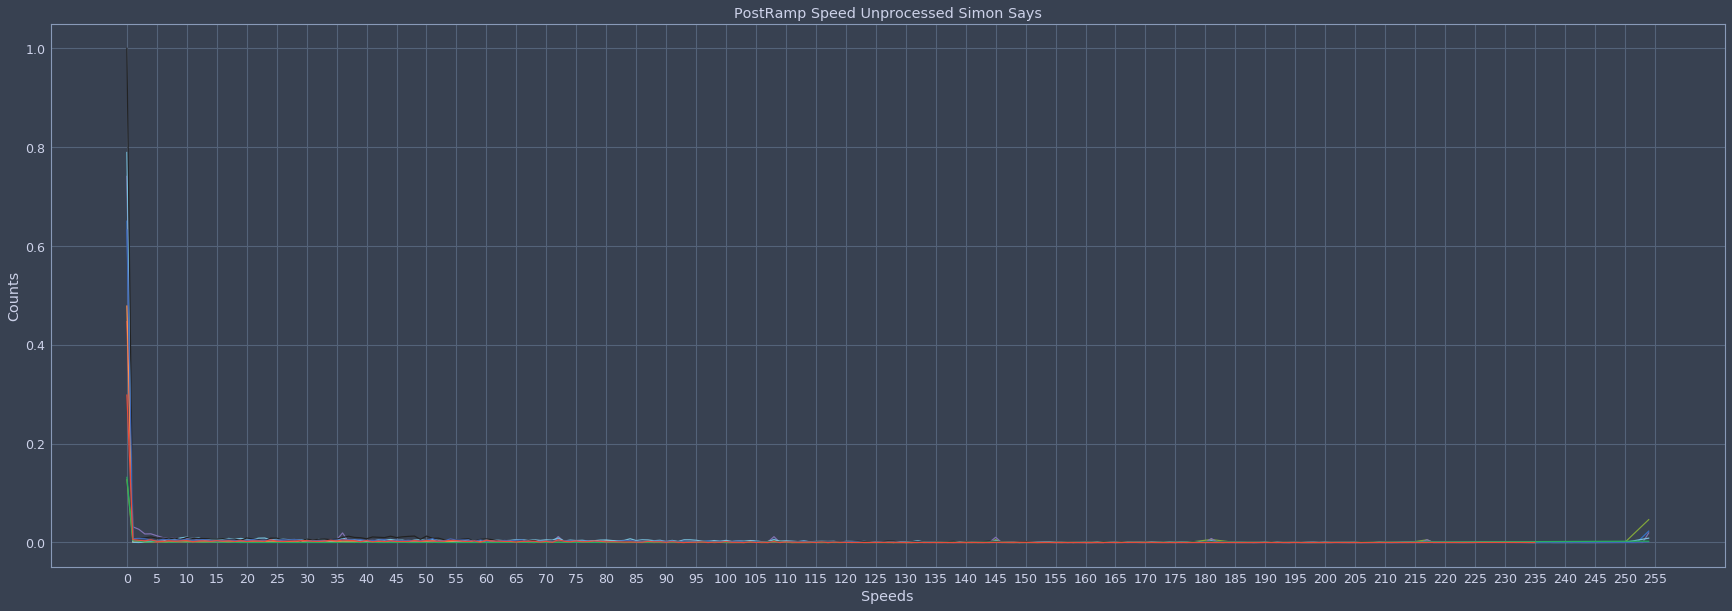

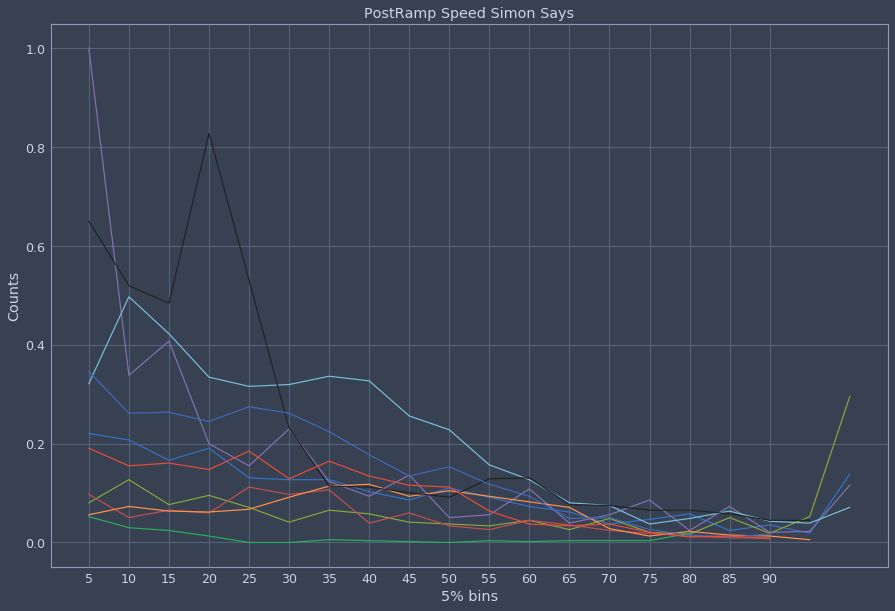

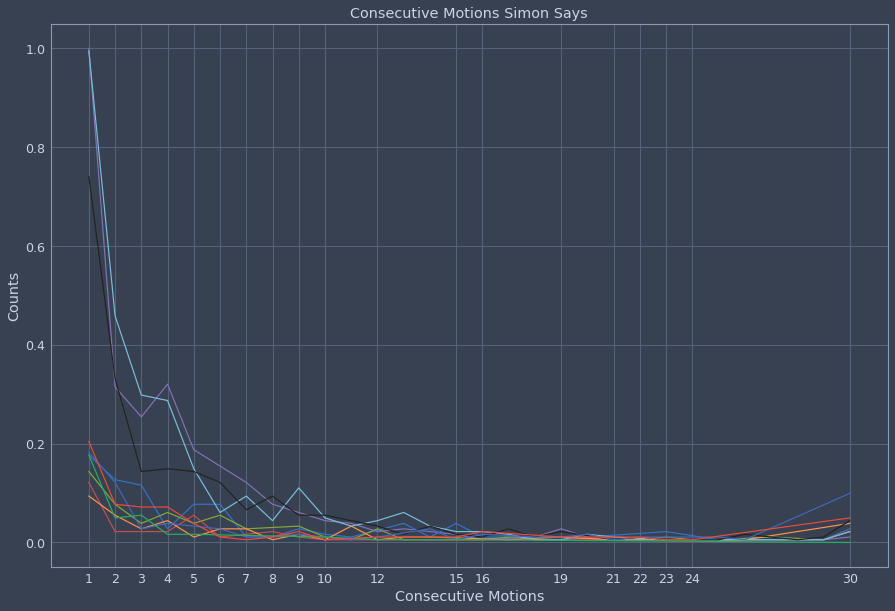

In [5]:
############################# PreRamp Speed Unprocessed #############################
plt.figure(figsize=(30,10))
x_array_list = []
counts_list = []
for data in SimonSays:
    x_array, counts = prerampspeed(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)

counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])
plt.title("PreRamp Speed Unprocessed Simon Says")
plt.xlabel("Speeds")
plt.ylabel("Counts")
plt.xticks(range(0, 260, 5))
plt.show()

############################# PreRamp Speed Processed #############################
plt.figure(figsize=(15,10))
x_array_list = []
counts_list = []
for data in SimonSays:
    x_array, counts = prerampspeed_processing(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)

counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])
       
for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])
plt.title("PreRamp Speed Simon Says")
plt.xlabel("5% bins")
plt.ylabel("Counts")
plt.xticks(x_array)
plt.show()

############################# PostRamp Speed Unprocessed #############################
plt.figure(figsize=(30,10))
x_array_list = []
counts_list = []
for data in SimonSays:
    x_array, counts = postrampspeed(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)

counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])
plt.title("PostRamp Speed Unprocessed Simon Says")
plt.xlabel("Speeds")
plt.ylabel("Counts")
plt.xticks(range(0, 260, 5))
plt.show()

############################# PostRamp Speed Processed #############################
plt.figure(figsize=(15,10))
x_array_list = []
counts_list = []
for data in SimonSays:
    x_array, counts = postrampspeed_processing(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)
    
counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])
plt.title("PostRamp Speed Simon Says")
plt.xlabel("5% bins")
plt.ylabel("Counts")
plt.xticks(x_array)
plt.show()

############################# Consecutive Motion ############################# 
plt.figure(figsize=(15,10))
x_array_list = []
counts_list = []
for data in SimonSays:
    x_array, counts = consecutivemotion_processing(data)
    x_array_list.append(x_array)
    counts_list.append(counts)
#     plt.plot(x_array, counts)
  
counts_max = max([max(x) for x in counts_list])
counts_min = min([min(x) for x in counts_list])

counts_list_norm = []
for element in counts_list:
    counts_list_norm.append([(x - counts_min) / (counts_max - counts_min) for x in element])

for i in range(len(x_array_list)):
    plt.plot(x_array_list[i], counts_list_norm[i])  
plt.title("Consecutive Motions Simon Says")
plt.xlabel("Consecutive Motions")
plt.ylabel("Counts")
plt.xticks(x_array)
plt.show()